In [12]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.max(0, x)

In [27]:
class Backpropagation:
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        self.__input_nodes = input_nodes
        self.__hidden_nodes = hidden_nodes
        self.__output_nodes = output_nodes


        self.__W2 = (np.random.randn(self.__input_nodes, self.__hidden_nodes) / 
                     np.sqrt(self.__input_nodes))
        self.__b2 = np.random.rand(self.__hidden_nodes)
        
        self.__W3 = (np.random.randn(self.__hidden_nodes, self.__output_nodes) / 
                     np.sqrt(self.__hidden_nodes))
        self.__b3 = np.random.rand(self.__output_nodes)


        self.__Z3 = np.zeros([1, output_nodes])
        self.__A3 = np.zeros([1, output_nodes])
        
        self.__Z2 = np.zeros([1, hidden_nodes])
        self.__A2 = np.zeros([1, hidden_nodes])
        
        self.__Z1 = np.zeros([1, input_nodes])
        self.__A1 = np.zeros([1, input_nodes])

        self.__learning_rate = learning_rate

    def __feed_forward(self):
        delta = 1e-7

        self.__Z1 = self.__input_data
        self.__A1 = self.__input_data

        self.__Z2 = np.dot(self.__A1, self.__W2) + self.__b2
        self.__A2 = sigmoid(self.__Z2)

        self.__Z3 = np.dot(self.__A2, self.__W3) + self.__b3
        self.__A3 = sigmoid(self.__Z3)

        return -np.sum(self.__target_data * np.log(self.__A3 + delta) + 
                       (1 - self.__target_data) * np.log((1 - self.__A3) + delta))
    
    def loss_val(self):
        delta = 1e-7

        self.__Z1 = self.__input_data
        self.__A1 = self.__input_data

        self.__Z2 = np.dot(self.__A1, self.__W2) + self.__b2
        self.__A2 = sigmoid(self.__Z2)

        self.__Z3 = np.dot(self.__A2, self.__W3) + self.__b3
        self.__A3 = sigmoid(self.__Z3)

        return -np.sum(self.__target_data * np.log(self.__A3 + delta) + 
                       (1 - self.__target_data) * np.log((1 - self.__A3) + delta))
    
    def train(self, input_data, target_data):
        self.__input_data = input_data
        self.__target_data = target_data

        loss_val = self.__feed_forward()

        loss_3 = (self.__A3 - self.__target_data) * self.__A3 * (1 - self.__A3)

        self.__W3 -= self.__learning_rate * np.dot(self.__A2.T, loss_3)
        self.__b3 = self.__b3 - self.__learning_rate * loss_3

        loss_2 = np.dot(loss_3, self.__W3.T) * self.__A2 * (1 - self.__A2)

        self.__W2 -= self.__learning_rate * np.dot(self.__A1.T, loss_2)
        self.__b2 = self.__b2 - self.__learning_rate * loss_2

    def predict(self, input_data):
        Z2 = np.dot(input_data, self.__W2) + self.__b2
        A2 = sigmoid(Z2)

        Z3 = np.dot(A2, self.__W3) + self.__b3
        A3 = sigmoid(Z3)

        predicted_num = np.argmax(A3)

        return predicted_num
    
    def accuracy(self, test_data):
        matched_list = []
        not_matched_list = []

        for index in range(len(test_data)):
            label = int(test_data[index, 0])
            data = (test_data[index, 1:] / 255.0 * 0.99) + 0.01
            predicted_num = self.predict(np.array(data, ndmin=2))

            if label == predicted_num:
                matched_list.append(index)
            else:
                not_matched_list.append(index)

        print("Current a accuracy =", 100 * len(matched_list) / len(test_data), " %")

In [7]:
training_data = np.loadtxt(r"C:\Users\skygr\OneDrive\바탕 화면\mnist_train.csv", delimiter=',', 
                           dtype=np.float32, encoding='utf-8')
test_data = np.loadtxt(r"C:\Users\skygr\OneDrive\바탕 화면\mnist_test.csv", delimiter=',', 
                           dtype=np.float32, encoding='utf-8')

In [44]:
input_nodes, hidden_nodes, output_nodes = 784, 100, 10
learning_rate = 0.3
epochs = 5

bp = Backpropagation(input_nodes, hidden_nodes, output_nodes, learning_rate)


from datetime import datetime

start_time = datetime.now()

for i in range(epochs):
    for step in range(len(training_data)):
        target_data = np.zeros(output_nodes) + 0.01
        target_data[int(training_data[step, 0])] = 0.99

        input_data = (training_data[step, 1:] / 255.0 * 0.99) + 0.01

        bp.train(np.array(input_data, ndmin=2), np.array(target_data, ndmin=2))

        if step % 400 == 0:
            print("step =", step, ", loss value =", bp.loss_val())

end_time = datetime.now()

print("\n elapsed time =", end_time - start_time)

step = 0 , loss value = 2.8961957928038853
step = 400 , loss value = 2.386611055187281
step = 800 , loss value = 1.4866808735006778
step = 1200 , loss value = 0.7207881346550153
step = 1600 , loss value = 0.8467221851315764
step = 2000 , loss value = 2.6404209416330215
step = 2400 , loss value = 0.713459891244779
step = 2800 , loss value = 1.7586013122977187
step = 3200 , loss value = 0.8056715136744743
step = 3600 , loss value = 0.7101549275638553
step = 4000 , loss value = 0.9222628237650018
step = 4400 , loss value = 0.8013073897919606
step = 4800 , loss value = 0.9367504413766764
step = 5200 , loss value = 0.7682449462575855
step = 5600 , loss value = 0.9337635522988033
step = 6000 , loss value = 0.8012732102121636
step = 6400 , loss value = 0.9289875932961269
step = 6800 , loss value = 0.9016592821487108
step = 7200 , loss value = 0.7927896485515307
step = 7600 , loss value = 0.8725172453412727
step = 8000 , loss value = 0.9596275814266108
step = 8400 , loss value = 0.799401379480

In [45]:
bp.accuracy(test_data)

Current a accuracy = 96.43  %


Predicted Label:  3


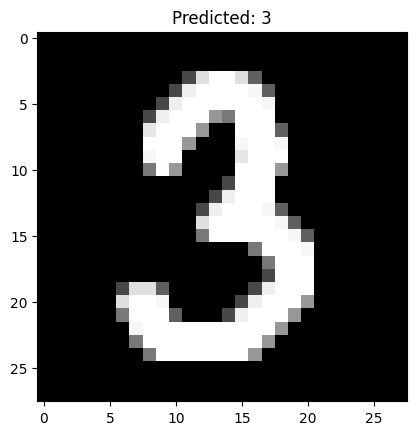

In [74]:
from PIL import Image

image_path = r"ML_YouTube_test_number\test3_1.png"

with Image.open(image_path) as img:
    img = img.resize((28, 28))
    img = img.convert('L')

image_array = np.array(img)
image_array = (image_array / 255.0 * 0.99) + 0.01
image_data = np.array(image_array.flatten(), ndmin=2)

predicted_label = bp.predict(image_data)
print("Predicted Label: ", predicted_label)

import matplotlib.pyplot as plt
plt.imshow(img, cmap='gray')
plt.title(f'Predicted: {predicted_label}')
plt.show()